# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Explore the EEG Data

In [2]:
df = pd.read_csv('EEG-HAR_Subject_2_Merged.csv')
print("Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns:
['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Not Used 1', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Not Used 2', 'Digital Channel 4 (D18)', 'Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2', 'Timestamp', 'Marker Channel', 'Timestamp (Formatted)', 'Activity', 'Timestamp_Gyro', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Activity_Label_x', 'Subject_ID_x', 'Timestamp_Accel', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)', 'Activity_Label_y', 'Subject_ID_y']

First 5 rows:
   Sample Index  EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  \
0           6.0       187500.0 -187500.022352 -18750

# Count the Activity Labels

In [3]:
df = pd.read_csv('EEG-HAR_Subject_2_Merged.csv')
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
OpenBCISession_s2-wall push-ups                  73339
OpenBCISession_s2-side-stepping                  59325
OpenBCISession_s2-chair squats                   58595
OpenBCISession_s2-seated boxing hooks            58179
OpenBCISession_s2-seated side bends              57741
OpenBCISession_s2-seated leg extensions          57459
OpenBCISession_s2-marching in place              56720
OpenBCISession_s2-standing heel to toe walk      56484
OpenBCISession_s2-light stationary cycling       39075
OpenBCISession_s2-seated medicine ball twists    38821
Name: count, dtype: int64


# Extract EEG Data and Save to New File

In [4]:
df = pd.read_csv('EEG-HAR_Subject_2_Merged.csv')
eeg_columns = [f'EXG Channel {i}' for i in range(16)]
meta_columns = ['Subject_ID_x', 'Activity']
eeg_only_df = df[eeg_columns + meta_columns]
eeg_only_df.to_csv('EEG_Only_Subject2.csv', index=False)
print("Created: EEG_Only_Subject2.csv")
print(f"Shape: {eeg_only_df.shape}")
print(eeg_only_df.head())

Created: EEG_Only_Subject2.csv
Shape: (555738, 18)
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0       187500.0 -187500.022352 -187500.022352 -187500.022352  -15542.084341   
1       187500.0 -187500.022352 -187500.022352 -187500.022352  -15533.501271   
2       187500.0 -187500.022352 -187500.022352 -187500.022352  -15519.553783   
3       187500.0 -187500.022352 -187500.022352 -187500.022352  -15544.028943   
4       187500.0 -187500.022352 -187500.022352 -187500.022352  -15539.849167   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -120418.190410   10376.238570     273.808870    4420.683315 -187500.022352   
1 -120356.723113   10384.665177     286.012922    4463.442202 -187500.022352   
2 -119781.009231   10389.627265     257.648558    4434.563748 -187500.022352   
3 -119762.256117   10369.689509     240.325956    4464.872714 -187500.022352   
4 -119185.983442   10381.334768     214.487340    4424.326649 -18750

# Rename Columns and Save the Updated File

In [5]:
df = pd.read_csv('EEG_Only_Subject2.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df.to_csv('EEG_Only_Subject2.csv', index=False)
print("Columns renamed and file updated.")
print("Last 2 columns:", df.columns[-2:].tolist())
print("\nPreview of data:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns renamed and file updated.
Last 2 columns: ['Subject_ID', 'Activity_Label_OpenBCI']

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0       187500.0 -187500.022352 -187500.022352 -187500.022352  -15542.084341   
1       187500.0 -187500.022352 -187500.022352 -187500.022352  -15533.501271   
2       187500.0 -187500.022352 -187500.022352 -187500.022352  -15519.553783   
3       187500.0 -187500.022352 -187500.022352 -187500.022352  -15544.028943   
4       187500.0 -187500.022352 -187500.022352 -187500.022352  -15539.849167   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -120418.190410   10376.238570     273.808870    4420.683315 -187500.022352   
1 -120356.723113   10384.665177     286.012922    4463.442202 -187500.022352   
2 -119781.009231   10389.627265     257.648558    4434.563748 -187500.022352   
3 -119762.256117   10369.689509     240.325956    4464.872714 -187500.022352   
4 -119185.

# Display Unique Activity Labels

In [6]:
print(df['Activity_Label_OpenBCI'].unique())

['OpenBCISession_s2-seated leg extensions'
 'OpenBCISession_s2-marching in place' 'OpenBCISession_s2-wall push-ups'
 'OpenBCISession_s2-seated boxing hooks'
 'OpenBCISession_s2-standing heel to toe walk'
 'OpenBCISession_s2-side-stepping' 'OpenBCISession_s2-seated side bends'
 'OpenBCISession_s2-seated medicine ball twists'
 'OpenBCISession_s2-chair squats'
 'OpenBCISession_s2-light stationary cycling']


# Count Rows per Activity Label

In [7]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print("Number of rows per activity label:\n")
print(activity_counts)

Number of rows per activity label:

Activity_Label_OpenBCI
OpenBCISession_s2-wall push-ups                  73339
OpenBCISession_s2-side-stepping                  59325
OpenBCISession_s2-chair squats                   58595
OpenBCISession_s2-seated boxing hooks            58179
OpenBCISession_s2-seated side bends              57741
OpenBCISession_s2-seated leg extensions          57459
OpenBCISession_s2-marching in place              56720
OpenBCISession_s2-standing heel to toe walk      56484
OpenBCISession_s2-light stationary cycling       39075
OpenBCISession_s2-seated medicine ball twists    38821
Name: count, dtype: int64


# Plot Activity Counts

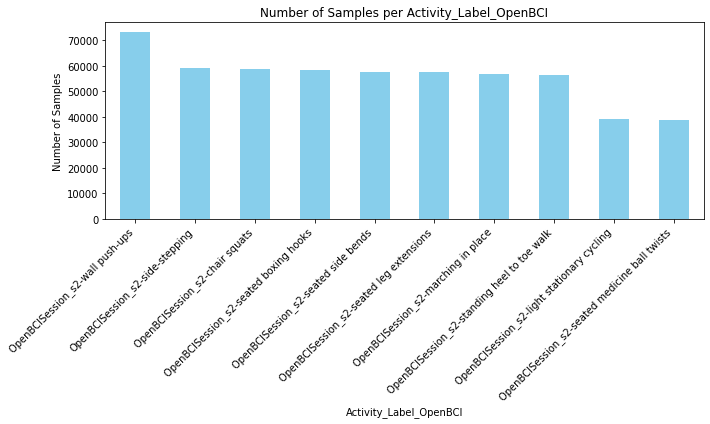

In [8]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Activity_Label_OpenBCI')
plt.xlabel('Activity_Label_OpenBCI')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Update Activity Labels and Save File

In [9]:
df = pd.read_csv('EEG_Only_Subject2.csv')

df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})

df['Subject_ID'] = df['Subject_ID'].replace('Subject 2', 2).astype(int)

activity_mapping = {
    'OpenBCISession_s2-seated leg extensions': 'Seated Leg Extensions',
    'OpenBCISession_s2-marching in place': 'Marching in Place',
    'OpenBCISession_s2-wall push-ups': 'Wall Push-ups',
    'OpenBCISession_s2-seated boxing hooks': 'Seated Boxing Hooks',
    'OpenBCISession_s2-standing heel to toe walk': 'Standing Heel-to-Toe Walk',
    'OpenBCISession_s2-side-stepping': 'Side-Stepping',
    'OpenBCISession_s2-seated side bends': 'Seated Side Bends',
    'OpenBCISession_s2-seated medicine ball twists': 'Seated Medicine Ball Twists',
    'OpenBCISession_s2-chair squats': 'Chair Squats',
    'OpenBCISession_s2-light stationary cycling': 'Light Stationary Cycling'
}

df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping)

df.to_csv('EEG_Only_Subject2.csv', index=False)

print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now:")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_930885/2074946356.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subject_ID'] = df['Subject_ID'].replace('Subject 2', 2).astype(int)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now:
['Seated Leg Extensions' 'Marching in Place' 'Wall Push-ups'
 'Seated Boxing Hooks' 'Standing Heel-to-Toe Walk' 'Side-Stepping'
 'Seated Side Bends' 'Seated Medicine Ball Twists' 'Chair Squats'
 'Light Stationary Cycling']

Final shape: 555738 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0       187500.0 -187500.022352 -187500.022352 -187500.022352  -15542.084341   
1       187500.0 -187500.022352 -187500.022352 -187500.022352  -15533.501271   
2       187500.0 -187500.022352 -187500.022352 -187500.022352  -15519.553783   
3       187500.0 -187500.022352 -187500.022352 -187500.022352  -15544.028943   
4       187500.0 -187500.022352 -187500.022352 -187500.022352  -15539.849167   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -120418.190410   10376.238570     273.808870    4420.683315 -187500.02235

# Count the Activity Labels in Updated Data

In [10]:
df = pd.read_csv('EEG_Only_Subject2.csv')
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print(activity_counts)

Activity_Label_OpenBCI
Wall Push-ups                  73339
Side-Stepping                  59325
Chair Squats                   58595
Seated Boxing Hooks            58179
Seated Side Bends              57741
Seated Leg Extensions          57459
Marching in Place              56720
Standing Heel-to-Toe Walk      56484
Light Stationary Cycling       39075
Seated Medicine Ball Twists    38821
Name: count, dtype: int64


# Map Activity Labels to Numeric Values and Save File

In [11]:
df = pd.read_csv('EEG_Only_Subject2.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df['Subject_ID'] = df['Subject_ID'].replace('Subject 2', 2).astype(int)
activity_mapping_to_numeric = {
    'Seated Leg Extensions': 1,
    'Marching in Place': 2,
    'Wall Push-ups': 3,
    'Seated Boxing Hooks': 4,
    'Standing Heel-to-Toe Walk': 5,
    'Side-Stepping': 6,
    'Seated Side Bends': 7,
    'Seated Medicine Ball Twists': 8,
    'Chair Squats': 9,
    'Light Stationary Cycling': 10
}
df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)
df.to_csv('EEG_Only_Subject2_Updated.csv', index=False)
print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now (numeric):")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_930885/3437214306.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now (numeric):
[ 1  2  3  4  5  6  7  8  9 10]

Final shape: 555738 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0       187500.0 -187500.022352 -187500.022352 -187500.022352  -15542.084341   
1       187500.0 -187500.022352 -187500.022352 -187500.022352  -15533.501271   
2       187500.0 -187500.022352 -187500.022352 -187500.022352  -15519.553783   
3       187500.0 -187500.022352 -187500.022352 -187500.022352  -15544.028943   
4       187500.0 -187500.022352 -187500.022352 -187500.022352  -15539.849167   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -120418.190410   10376.238570     273.808870    4420.683315 -187500.022352   
1 -120356.723113   10384.665177     286.012922    4463.442202 -187500.022352   
2 -119781.009231   10389.627265     257.648558    4434.563748 -187500.022352   
3 -119762.256117

# Count and Sort Activity Labels (Numeric)

In [12]:
df = pd.read_csv('EEG_Only_Subject2_Updated.csv')

activity_counts = df['Activity_Label_OpenBCI'].value_counts().sort_index()

print("Unique activity labels and their counts (sorted 1 → 10):")
print(activity_counts)
print(f"\nTotal count: {activity_counts.sum()}")

Unique activity labels and their counts (sorted 1 → 10):
Activity_Label_OpenBCI
1     57459
2     56720
3     73339
4     58179
5     56484
6     59325
7     57741
8     38821
9     58595
10    39075
Name: count, dtype: int64

Total count: 555738
